# P1. Exploration

## 1. Description Générale

En utilisant DBeaver et les paramètres de connexion donnés par ailleurs, faire une description détaillée de la base de données fournie. Présenter notamment le diagramme entité - relation (ERD) et les différentes caractéristiques des tables de la base.  Quelles types de renseignement peut-on tirer de cette base de données ?   

**Description détaillée de la base de données fournie.**

La Base fournie s'appelle "chinook" composée des 11 tables suivantes:
- albums: champs:
                   AlbumId  (INTEGER)
                   Title    (NVARCHAR(160)
                   ArtistId (INTEGER)
- artists: champs:
                   ArtistId (INTEGER)
                   Name (NVARCHAR (120))
- customers: champs:
                   CustomerId (INTEGER)
                   FirstName  (NVARCHAR(40))
                   LastName   (NVARCHAR(20))
                   Company    (NVARCHAR(80))
                   Address    (NVARCHAR(70))
                   City       (NVARCHAR(40))
                   State      (NVARCHAR(40))
                   Country    (NVARCHAR(40))
                   PostalCode (NVARCHAR(10))
                   Phone      (NVARCHAR(24))
                   Fax        (NVARCHAR(24))
                   Email      (NVARCHAR(60))
                   SupportRepId (INTEGER)
- employees: champs:
                   EmployeeId INTEGER
                   LastName   (NVARCHAR(20))
                   FirstName  (NVARCHAR(20))
                   Title      (NVARCHAR(30))
                   ReportsTo  INTEGER
                   BirthDate  DATETIME
                   HireDate   DATETIME
                   Address   (NVARCHAR(70))
                   City      (NVARCHAR(40))
                   State     (NVARCHAR(40))
                   Country   (NVARCHAR(40))
                   PostalCode  (NVARCHAR(10))
                   Phone     (NVARCHAR(24))
                   Fax       (NVARCHAR(24))
                   Email     (NVARCHAR(60))
-genres: champs:
-invoice_items: champs:
-invoices: champs:
-media_types: champs:
-playlist_track: champs:
-playlists: champs:
-tracks: champs:
TrackId  
Name 
AlbumId 
MediaTypeId 
GenreId 
Composer 
Milliseconds 
Bytes 
UnitPrice 



**Présentation du diagramme entité - relation (ERD)**

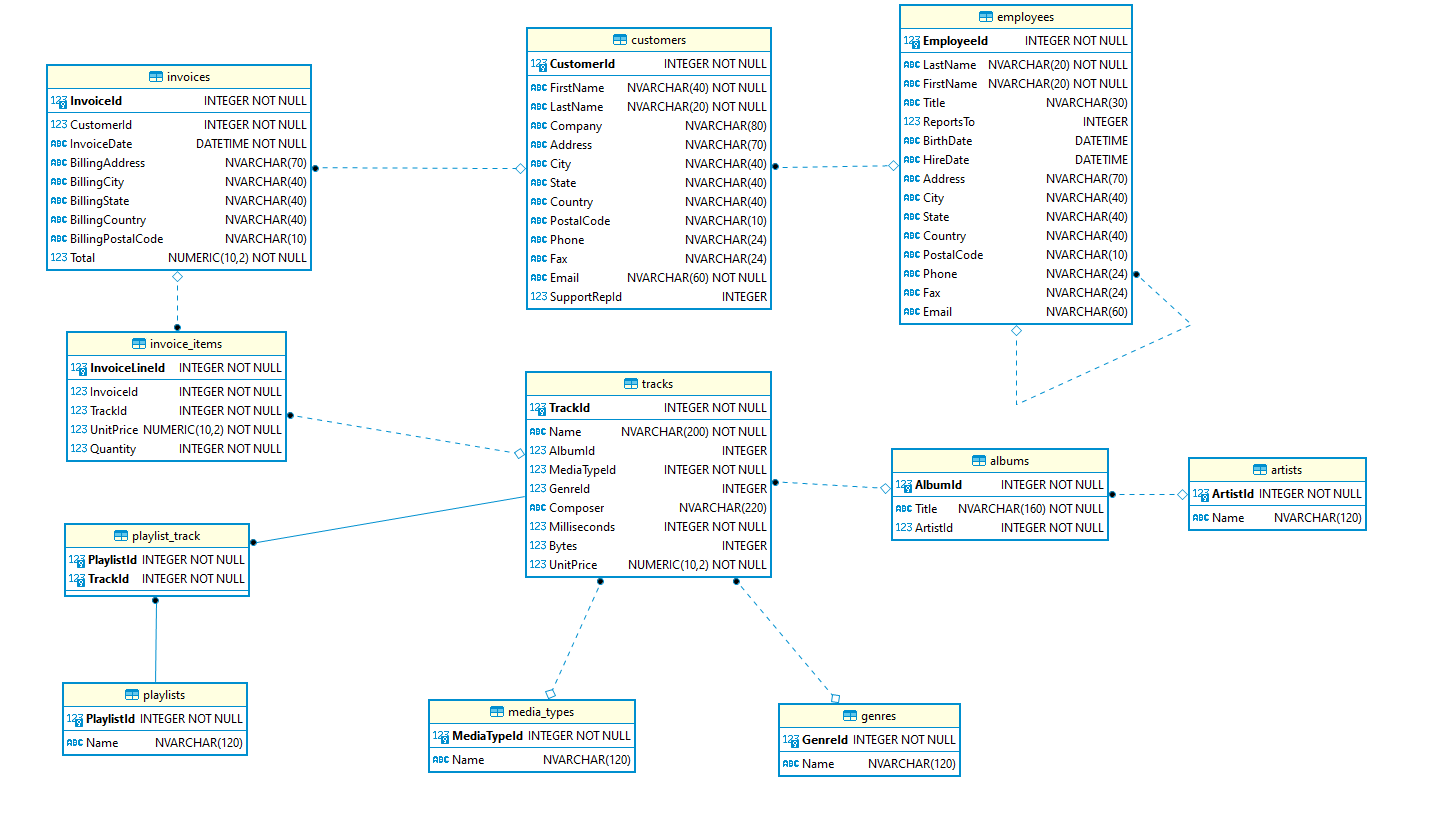

*A compléter*

---

## 2. Exploration SQL via python / pandas
Dans cette partie, on s'attache à explorer la base de données en utilisant le language SQL pour les requêtes et le language Python (+ module pandas) pour récupérer les résultats de façon programmatique.  
Vous pouvez utiliser DBeaver ou outil similaire pour préparer / tester vos requêtes mais celles-ci doivent être reportées et appliquées dans du code Python comme présenté dans les quelques examples à suivre.  
*Pour les résultats "longs", un aperçu des quelques premières lignes et le comptage total des résultats est suffisant.*

In [1]:
import os
import sqlite3
import pandas as pd   
from pandas import option_context

In [2]:
from pathlib import Path

In [3]:
# Ouvre connection vers SQLite db
chemin_bdd = Path('db') / 'chinook.db'
conn = sqlite3.connect(chemin_bdd)

### Organigramme Compagnie

Q01. Ecrivez et exécutez une unique requête listant chaque employée de la compagnie (Id, nom + prénom, Titre) ainsi que son manager direct (nom + prénom, Titre)

In [ ]:
# requête de départ
query = """
WITH ReportsTo as EmployeeId(
    SELECT EmployeeId, LastName, FirstName, Title, ReportsTo
    FROM employees)
    
    
"""
results = pd.read_sql_query(query, conn)
results

Q02. Pour chaque artiste présent dans cette BDD, indiquez le nombre d'albums de cet artiste également répertorié (Liste triée par nom d'artiste)


In [4]:
query = """
    SELECT Name AS "Artiste", GROUP_CONCAT(Title) AS "titre", count(Title) AS "Nombre d'albums"
    FROM albums
    JOIN artists ON albums.ArtistId = artists.ArtistId
    GROUP BY Name

"""
with option_context('display.max_colwidth', 200):
    
    results = pd.read_sql_query(query, conn)
    display(results.head())

,Artiste,titre,Nombre d'albums
0,AC/DC,"For Those About To Rock We Salute You,Let There Be Rock",2
1,Aaron Copland & London Symphony Orchestra,"A Copland Celebration, Vol. I",1
2,Aaron Goldberg,Worlds,1
3,Academy of St. Martin in the Fields & Sir Neville Marriner,The World of Classical Favourites,1
4,Academy of St. Martin in the Fields Chamber Ensemble & Sir Neville Marriner,Sir Neville Marriner: A Celebration,1


Q03. Produire une liste des albums reprenant également l'artiste de l'album, le nombre de pistes, la durée de toutes les pistes (en minutes) et le coût total (Liste triée par artiste puis nom d'album)


In [5]:
query3 = """
    SELECT albums.Title AS "Album",
           artists.name AS "Nom de l'artiste", 
           COUNT(tracks.AlbumId) AS "Nombre de pistes",
           SUM(tracks.Milliseconds)/60000 AS "Durée en minutes",
           SUM(tracks.UnitPrice) AS "Coût total"
    FROM albums
    INNER JOIN artists ON albums.ArtistId = artists.ArtistId
    INNER JOIN tracks ON albums.AlbumId = tracks.AlbumId
    GROUP BY albums.AlbumId
    ORDER BY artists.name, albums.Title;
"""

results = pd.read_sql_query(query3, conn)
results

,Album,Nom de l'artiste,Nombre de pistes,Durée en minutes,Coût total
0,For Those About To Rock We Salute You,AC/DC,10,40,9.90
1,Let There Be Rock,AC/DC,8,40,7.92
2,"A Copland Celebration, Vol. I",Aaron Copland & London Symphony Orchestra,1,3,0.99
3,Worlds,Aaron Goldberg,1,4,0.99
4,The World of Classical Favourites,Academy of St. Martin in the Fields & Sir Nevi...,2,7,1.98
...,...,...,...,...,...
342,Vinicius De Moraes,Vinícius De Moraes,15,54,14.85
343,Bach: Goldberg Variations,Wilhelm Kempff,1,2,0.99
344,Bartok: Violin & Viola Concertos,Yehudi Menuhin,1,4,0.99
345,Bach: The Cello Suites,Yo-Yo Ma,1,2,0.99


Q04. Produire une liste des toutes les playlists reprenant son nom, le nombre de pistes, la durée de toutes les pistes (en minutes) et le coût total (Liste triée par nom de playlist)


Q05. Produire une liste des tous les genres de musique reprenant son genre, le nombre de pistes, la durée de toutes les pistes (en minutes), le coût total et le coût moyen (Liste triée par nom de genre)


Q06. Indiquez les caractéristiques principales de toutes les pistes correspondant au genre 'Science Fiction' (nom de piste, album, artiste de l'album, compositeur, nom du type de media, durée (en secondes) et prix unitaire


Q07. Retrouvez tous les clients (nom, prénom, email, pays) ayant acheté de la musique de type 'World'


In [6]:
query7 = """
    SELECT DISTINCT customers.LastName AS "Nom",
           customers.FirstName AS "Prénom",
           customers.Email AS "email",
           customers.Country AS "Pays"
    FROM customers
    JOIN invoices ON customers.CustomerId = invoices.CustomerId
    JOIN invoice_items ON invoices.InvoiceId = invoice_items.InvoiceId
    JOIN tracks ON invoice_items.TrackId = tracks.TrackId
    JOIN genres ON tracks.GenreId = genres.GenreId
    WHERE genres.Name = "World"
    ORDER BY customers.LastName;
"""

results = pd.read_sql_query(query7, conn)
results

,Nom,Prénom,email,Pays
0,Almeida,Roberto,roberto.almeida@riotur.gov.br,Brazil
1,Fernandes,João,jfernandes@yahoo.pt,Portugal
2,Hansen,Bjørn,bjorn.hansen@yahoo.no,Norway
3,Johansson,Joakim,joakim.johansson@yahoo.se,Sweden
4,Mitchell,Aaron,aaronmitchell@yahoo.ca,Canada
5,Murray,Steve,steve.murray@yahoo.uk,United Kingdom
6,Peterson,Jennifer,jenniferp@rogers.ca,Canada
7,Philips,Mark,mphilips12@shaw.ca,Canada
8,Silk,Martha,marthasilk@gmail.com,Canada


Q08. Nommez les 15 artistes comptant le plus de pistes de type 'Rock'


In [7]:
query8 = """
    SELECT artists.Name AS "Artiste",
           COUNT(tracks.TrackId) AS "Nombre de pistes"
    FROM artists
    JOIN albums ON artists.ArtistId = albums.ArtistId
    JOIN tracks ON albums.AlbumId = tracks.AlbumId
    JOIN genres ON tracks.GenreId = genres.GenreId
    WHERE genres.Name = "Rock"
    GROUP BY artists.Name
    ORDER BY COUNT(tracks.TrackId) DESC
    LIMIT 15;
"""

results = pd.read_sql_query(query8, conn)
results

,Artiste,Nombre de pistes
0,Led Zeppelin,114
1,U2,112
2,Deep Purple,92
3,Iron Maiden,81
4,Pearl Jam,54
5,Van Halen,52
6,Queen,45
7,The Rolling Stones,41
8,Creedence Clearwater Revival,40
9,Kiss,35


Q09. Nommez les 5 meilleurs clients 

In [8]:
query9 = """
    SELECT FirstName, LastName, SUM(invoices.Total) AS "Dépenses totales"
    FROM customers
    JOIN invoices ON customers.CustomerId = invoices.CustomerId
    GROUP BY customers.CustomerId
    ORDER BY SUM(invoices.Total) DESC
    
"""
results = pd.read_sql_query(query9, conn)
results.head(5)

,FirstName,LastName,Dépenses totales
0,Helena,Holý,49.62
1,Richard,Cunningham,47.62
2,Luis,Rojas,46.62
3,Ladislav,Kovács,45.62
4,Hugh,O'Reilly,45.62


Q10. Détaillez (piste, album, artiste, genre et type media) tous les achats effectués par le client 'Richard Cunningham' (triée par date achat)


Q11. Produire la liste de tous les contacts de la base de données (clients & employés) avec leur nom, prénom, type (client ou employé), email, pays et no de téléphone


Q12. Produire la liste de répartition des ventes par pays (basée sur `BillingCountry`)

In [10]:
query12 = """
    SELECT i.BillingCountry AS "Pays",
           SUM(i.Total) AS "Ventes",
           (SUM(i.Total) / (SELECT SUM(i.Total) FROM invoices i ))*100 AS "Part en %"
    FROM invoices i
    GROUP BY i.BillingCountry
    ORDER BY SUM(i.Total) DESC;
"""

results = pd.read_sql_query(query12, conn)
results

,Pays,Ventes,Part en %
0,USA,523.06,22.462424
1,Canada,303.96,13.053337
2,France,195.10,8.378425
3,Brazil,190.10,8.163704
4,Germany,156.48,6.719918
5,United Kingdom,112.86,4.846689
6,Czech Republic,90.24,3.875290
7,Portugal,77.24,3.317015
8,India,75.26,3.231985
9,Chile,46.62,2.002061
